In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
import time
from pathlib import Path

onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.code_comparison import *

%load_ext autoreload
%autoreload 2


print("Done")

AttributeError: module 'xarray' has no attribute 'set_options'

- Recommended Xarray that I've been using for a while was 2022.6.0. This is in the "new" environment
- One before newest was 2023.06.0
- Newest is only on github I think - no proper release

In [2]:
xr.__version__

AttributeError: module 'xarray' has no attribute '__version__'

In [ ]:
db = CaseDB(
    case_dir = os.path.join(onedrive_path, r"Project\collab\tech\cases"),
    grid_dir = os.path.join(onedrive_path, r"Project\collab\tech\grid")
)

toload = [
    dict(name="tn30", id="d8a-tn_30ev", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True),
]

casestore = dict()

for case in toload:
    casestore[case["name"]] = Load.case_2D(db.casepaths[case["id"]], gridfilepath = db.gridpaths[case["grid"]],double_load = False, keep_boundaries = True)

--> g11, g_22, dx, dy and J will not be unnormalised
CHECK: Total domain volume is 4.381E+07 [m3]


AttributeError: 'DataArray' object has no attribute 'set_xindex'

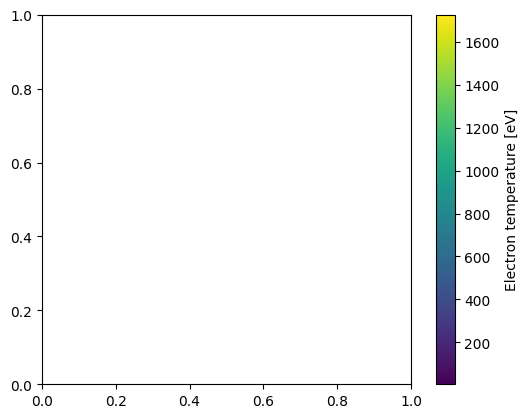

In [ ]:
start = time.time()

casestore["tn30"].ds.isel(t=-1)["Te"].bout.pcolormesh()

end = time.time()
wtime = end - start
print(f"Wall time: {wtime}")